In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
combined_data = pd.read_csv('data/combined_data/cleaned_data.csv')

In [116]:
combined_data.head()

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,0.0,6.9,3.3,7.6,239.695455
2,24.0,31.8,16.9,51.0,0.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,0.0,7.7,3.7,7.6,264.064286
4,23.1,30.6,17.4,46.0,0.0,6.9,3.3,5.4,223.208333


In [117]:
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

## DECISION TREE REGRESSOR

In [119]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(criterion='mse')
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [120]:
f'Coefficient of determination R^2 on train set {tree.score(X_train, y_train)}'
# must be close to 1, 1 is perfect fit

'Coefficient of determination R^2 on train set 1.0'

In [121]:
f'Coefficient of determination R^2 on test set {tree.score(X_test, y_test)}'

'Coefficient of determination R^2 on test set 0.008111855657733646'

In [122]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(tree, X, y, cv = 3)

In [123]:
score.mean()

-0.21168438424691902

#### TREE VISUALIZATION

In [124]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [125]:
# Create DOT data
dot_data = export_graphviz(tree, out_file=None, 
                                feature_names=X.columns,  
                                class_names=y.index)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png())

In [126]:
graph.write_png("d-tree.png")

True

In [127]:
pred = tree.predict(X_test)

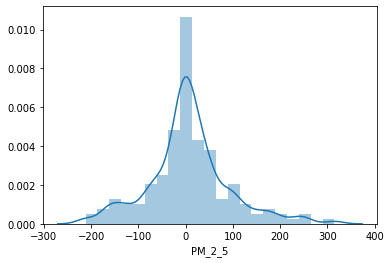

In [128]:
sns.distplot(y_test - pred)

#### HYPERPARAMETER TUNING

In [129]:
params = {
    'splitter': ['best', 'random'],
    'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
    'min_samples_leaf': list(range(1,6)),
    'min_weight_fraction_leaf': [i/10 for i in range(1, 5)],
    'max_features': ['auto', 'log2', 'sqrt', None],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70]
}

In [130]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(tree, params, scoring='neg_mean_squared_error', cv=5)
search.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
               

In [131]:
search.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': 70,
 'min_samples_leaf': 4,
 'min_weight_fraction_leaf': 0.2,
 'splitter': 'random'}

In [132]:
search.best_score_

-4106.45851892501

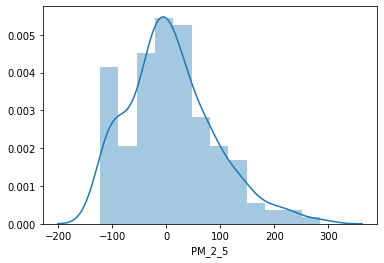

In [133]:
pred = search.predict(X_test)
sns.distplot(y_test-pred)

In [134]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred))}")

Mean Abs Error: 62.08149383737805
Mean Sq Error: 6586.19349179696
Root Mean Error: 81.15536637707305


In [135]:
search.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=70,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=2,
                      min_weight_fraction_leaf=0.2, presort='deprecated',
                      random_state=None, splitter='random')

In [136]:
# Create DOT data
dot_data = export_graphviz(search.best_estimator_, out_file=None, 
                                feature_names=X.columns,  
                                class_names=y.index)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png())
graph.write_png("d-tree-optimized.png")

True